## Car Brand Classifier

In [28]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [29]:
# re-size all the images to this
image_size = [220, 220]

train_path = './Datasets/train'
valid_path = './Datasets/test'


Import ResNet50 architecture

In [30]:
resnet = ResNet50(input_shape=image_size + [3], weights='imagenet', include_top=False)

# (images_size + [3]) means images have 3 channels because they are colored images

Below for loop means we don't need to train every layers in ResNet50 model, we just need to train first and last layer of the model.

In [31]:
for layer in resnet.layers:
    layer.trainable = False

In [32]:
# Find number of classes
folders = glob('Datasets/train/*')
len(folders)

3

In [33]:
x = Flatten()(resnet.output)

Create model object

In [34]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [35]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 220, 220, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 226, 226, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 110, 110, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

Define cost function and optimizer for the model

In [36]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [37]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [38]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (220, 220),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [39]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (220, 220),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [40]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\admin\AppData\Local\Temp\ipykernel_1608\1167563505.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 38s 19s/step - loss: 5.0856 - accuracy: 0.3438 - val_loss: 18.3612 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 16s 11s/step - loss: 9.0816 - accuracy: 0.3281 - val_loss: 6.5186 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 16s 11s/step - loss: 5.3293 - accuracy: 0.4531 - val_loss: 5.7468 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 16s 11s/step - loss: 8.9305 - accuracy: 0.3281 - val_loss: 3.3290 - val_accuracy: 0.5690
Epoch 5/50
2/2 [==============================] - 16s 11s/step - loss: 6.2444 - accuracy: 0.2812 - val_loss: 5.3614 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 16s 11s/step - loss: 3.4645 - accuracy: 0.4375 - val_loss: 5.3940 - val_accuracy: 0.1552
Epoch 7/50
2/2 [==============================] - 16s 11s/step - loss: 4.6206 - accuracy: 0.3750 - val_loss: 5.3211 - val_accuracy: 0.1552
Epoch 8/50
2/2 [==========

If you want to see the losses and acuuracies of the model then you can use `.history` property of the model.

In [41]:
r.history

{'loss': [5.085613250732422,
  9.081598281860352,
  5.329322814941406,
  8.93050765991211,
  6.244440078735352,
  3.464474678039551,
  4.620605945587158,
  3.3813867568969727,
  3.315319061279297,
  1.860886573791504,
  1.9546453952789307,
  1.8559541702270508,
  1.176451325416565,
  1.4427413940429688,
  1.0737261772155762,
  0.8971949815750122,
  0.7146111726760864,
  0.8303093910217285,
  0.7055231332778931,
  0.6194814443588257,
  0.4817284345626831,
  0.553704023361206,
  0.5376386642456055,
  0.47129660844802856,
  0.5093180537223816,
  0.4142529368400574,
  0.43801742792129517,
  0.34267479181289673,
  0.4011463224887848,
  0.35488343238830566,
  0.33285921812057495,
  0.34528079628944397,
  0.2961626648902893,
  0.32758647203445435,
  0.2989816665649414,
  0.3259628117084503,
  0.39013758301734924,
  0.31667786836624146,
  0.31309837102890015,
  0.2908986210823059,
  0.26133760809898376,
  0.2849624752998352,
  0.26863646507263184,
  0.25978031754493713,
  0.2782765328884125,
 

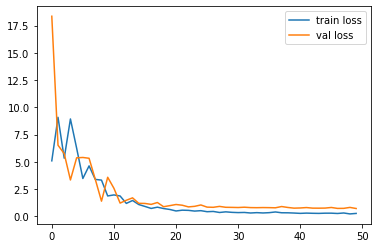

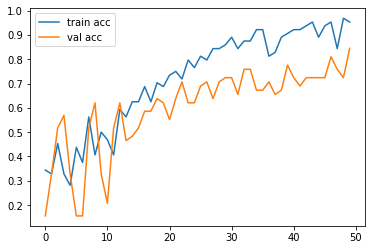

<Figure size 432x288 with 0 Axes>

In [42]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

Save model as h5 file

In [43]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [44]:
y_pred = model.predict(test_set)

In [45]:
y_pred

array([[8.90501067e-02, 8.86979818e-01, 2.39700824e-02],
       [4.40509245e-02, 5.09622395e-01, 4.46326703e-01],
       [1.90546992e-03, 9.78976846e-01, 1.91177782e-02],
       [3.06428934e-04, 9.87569511e-01, 1.21240495e-02],
       [2.69131828e-03, 5.80448925e-01, 4.16859835e-01],
       [1.96143627e-01, 4.40064408e-02, 7.59849906e-01],
       [1.36304356e-03, 9.93347585e-01, 5.28926868e-03],
       [4.64168191e-01, 4.05100703e-01, 1.30731076e-01],
       [7.20206141e-01, 1.63697734e-01, 1.16096117e-01],
       [1.49768114e-01, 7.85996139e-01, 6.42357990e-02],
       [2.32010800e-02, 7.78960109e-01, 1.97838813e-01],
       [8.83567989e-01, 1.02890313e-01, 1.35416733e-02],
       [3.58304113e-01, 3.12586963e-01, 3.29108894e-01],
       [3.07593774e-03, 9.56995726e-01, 3.99283990e-02],
       [2.42660139e-02, 5.64155996e-01, 4.11577910e-01],
       [2.62778904e-02, 9.13742542e-01, 5.99796139e-02],
       [4.69851822e-01, 6.61001680e-03, 5.23538113e-01],
       [1.55833288e-04, 4.09630

Select the class which has maximum probability

In [46]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [47]:
y_pred

array([1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 1,
       1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2], dtype=int64)

In [48]:
img=image.load_img('./Datasets/Test/lamborghini/11.jpg',target_size=(220,220))

Convert image to array

In [49]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [50]:
x.shape

(220, 220, 3)

In [51]:
x=x/255

Extend the dimension of image

In [52]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 220, 220, 3)

Predict the class of image

In [53]:
model.predict(img_data)

array([[9.4916404e-04, 1.5854953e-06, 9.9904925e-01]], dtype=float32)

In [54]:
a=np.argmax(model.predict(img_data), axis=1)